In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', None)

In [2]:
from collections import Counter
import arabic_reshaper 
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator
from langdetect import detect
from nltk.corpus import stopwords
import re
import nltk
from transformers import pipeline
from scipy.stats import zscore

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-23 22:35:41.401138: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Comments

**Comment Frequency Analysis**

Identify which videos receive the most comments

In [ ]:
df_video = pd.read_csv('Fetched-Data/video_stats.csv', index_col=0)

/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/3878963689.py:37: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/3878963689.py:37: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/3878963689.py:37: UserWarning: Glyph 129323 (\N{FACE WITH FINGER COVERING CLOSED LIPS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/3878963689.py:37: UserWarning: Glyph 129657 (\N{ADHESIVE BANDAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/3878963689.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes

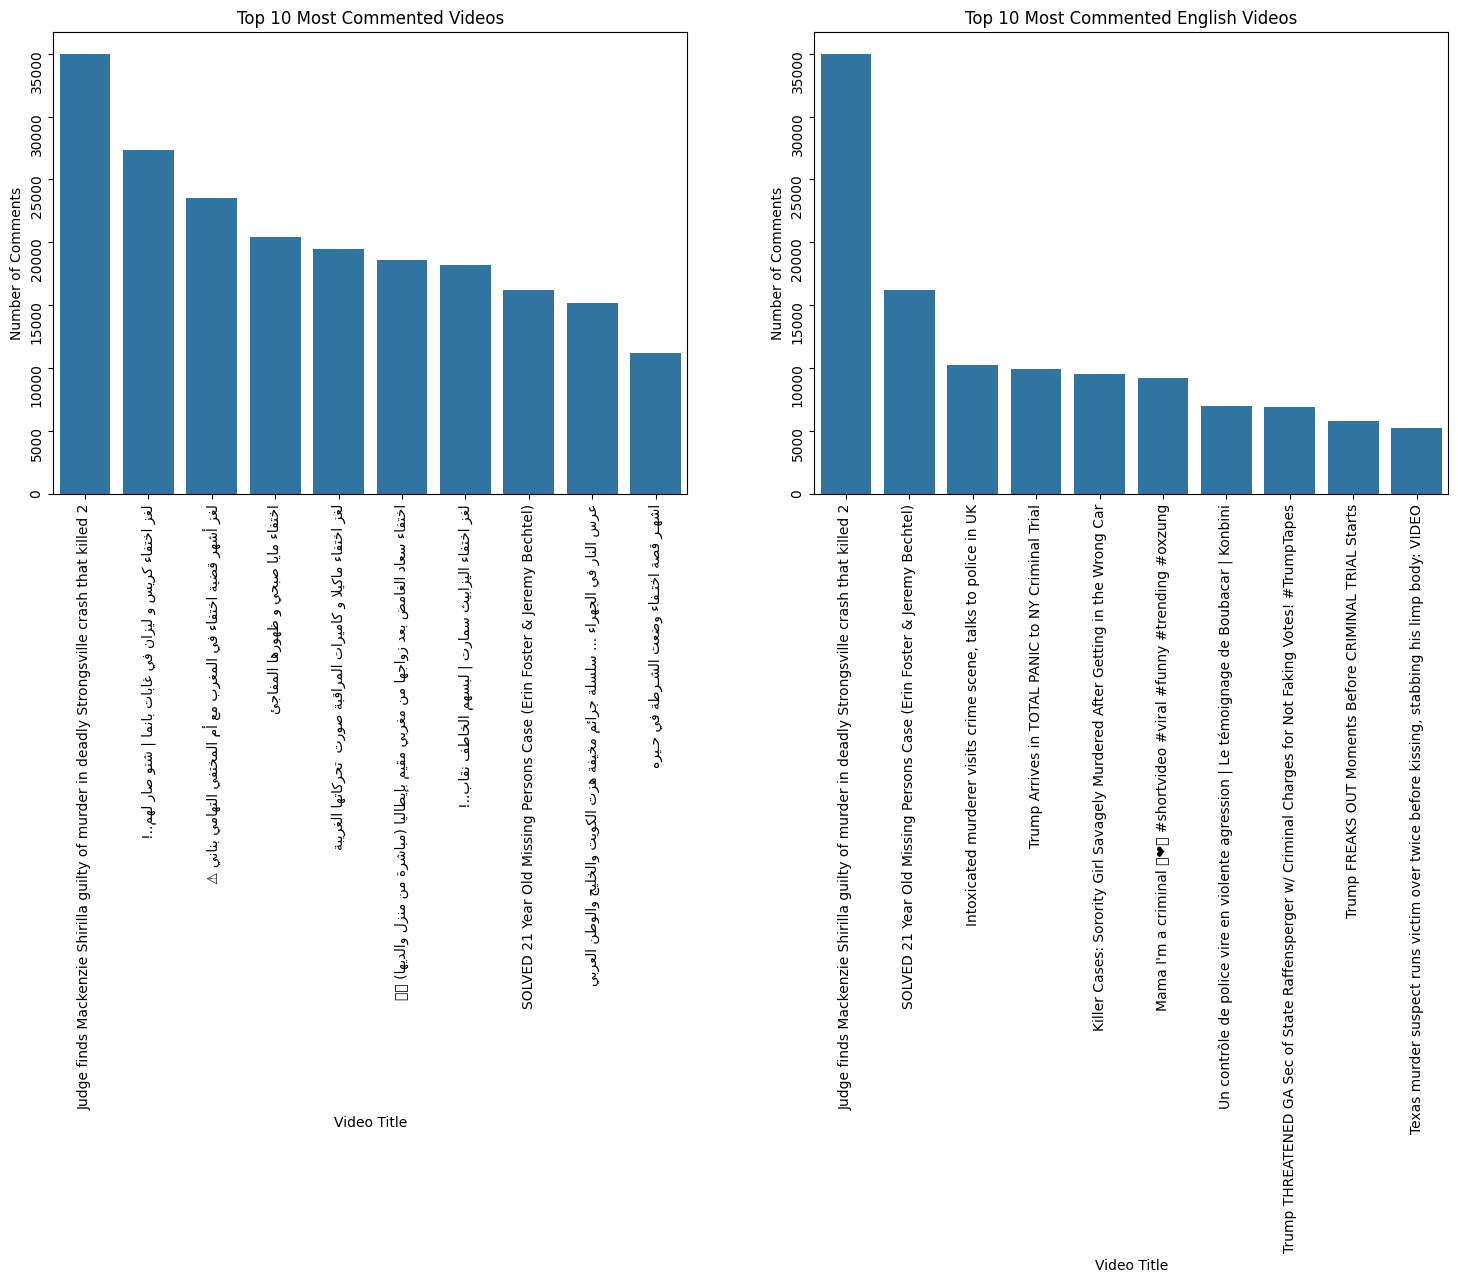

In [276]:
# Function to reshape and correctly display Arabic text
def process_arabic_text(text):
    try:
        reshaped_text = reshape(text)  # Reshape the Arabic text
        return get_display(reshaped_text)  # Correct the text direction to RTL
    except:
        return text  # Return the original text if any errors occur

# Top 10 videos by comments count
top_commented_videos = df_video.sort_values(['nb_comments'], ascending=False)[:10]

# Apply processing to channel names to handle Arabic properly
top_commented_videos['display_name'] = top_commented_videos['title'].apply(process_arabic_text)

# Top 10 english videos by comments count
top_commented_videos_en = df_video[df_video['Language']=='en'].sort_values(['nb_comments'], ascending=False)[:10]


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting all videos
sns.barplot(x='display_name', y='nb_comments', data=top_commented_videos, ax=axes[0])
axes[0].set_xlabel('Video Title')
axes[0].set_ylabel('Number of Comments')
axes[0].set_title('Top 10 Most Commented Videos')
axes[0].tick_params(labelrotation=90)

# Plotting english videos
sns.barplot(x='title', y='nb_comments', data=top_commented_videos_en, ax=axes[1])
axes[1].set_xlabel('Video Title')
axes[1].set_ylabel('Number of Comments')
axes[1].set_title('Top 10 Most Commented English Videos')
axes[1].tick_params(labelrotation=90)

# Adjust layout
plt.tight_layout()
plt.show()



Information about the video used to extract comments:

- "publishedAt": "2024-04-27T22:30:03Z",

- "channelId": "UCz8K1occVvDTYDfFo7N5EZw",

- "videoId" : "NV1Kh7wvuAM"

- "title": "Prime Crime: Pregnant Teen Vanishes After Uncle Picks Her Up from School",

## DataFrame Analysis

In [277]:
df_comments = pd.read_csv('Fetched-Data/video_comments.csv', index_col=0)
df_comments.head()

,channel_id,video_id,comment_id,comment,like,author,publishedAt,parent_id
0,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg,"If you’re ever injured in an accident, you can...",416,@LawAndCrime,2024-04-25T14:25:25Z,NaN
1,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2lZje06vFW,40:51 i think she meant to say “we no longer h...,19,@geminienergy,2024-04-28T08:05:43Z,UgyF78L-ERyJb0bfyJt4AaABAg
2,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2p-20Bnt1k,I absolutely agree with what you actually said...,10,@SH-hu4cl,2024-04-29T16:02:01Z,UgyF78L-ERyJb0bfyJt4AaABAg
3,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2pkRL8WCmw,You are.....,0,@ihateyoutubecomments8100,2024-04-29T23:04:54Z,UgyF78L-ERyJb0bfyJt4AaABAg
4,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2rW_BHL-z8,"I have no need at this time, but you have or s...",3,@cynthiatolman326,2024-04-30T15:33:31Z,UgyF78L-ERyJb0bfyJt4AaABAg


In [278]:
df_comments['publishedAt'] = pd.to_datetime(df_comments['publishedAt'])
df_comments.dropna(subset=['comment'], inplace=True)
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3331 entries, 0 to 3331
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   channel_id   3331 non-null   object
 1   video_id     3331 non-null   object
 2   comment_id   3331 non-null   object
 3   comment      3331 non-null   object
 4   like         3331 non-null   int64 
 5   author       3331 non-null   object
 6   publishedAt  3331 non-null   object
 7   parent_id    830 non-null    object
dtypes: int64(1), object(7)
memory usage: 234.2+ KB


**Temporal Analysis of Comments**

Analyzing when the majority of comments are made (time of day and day of the week).

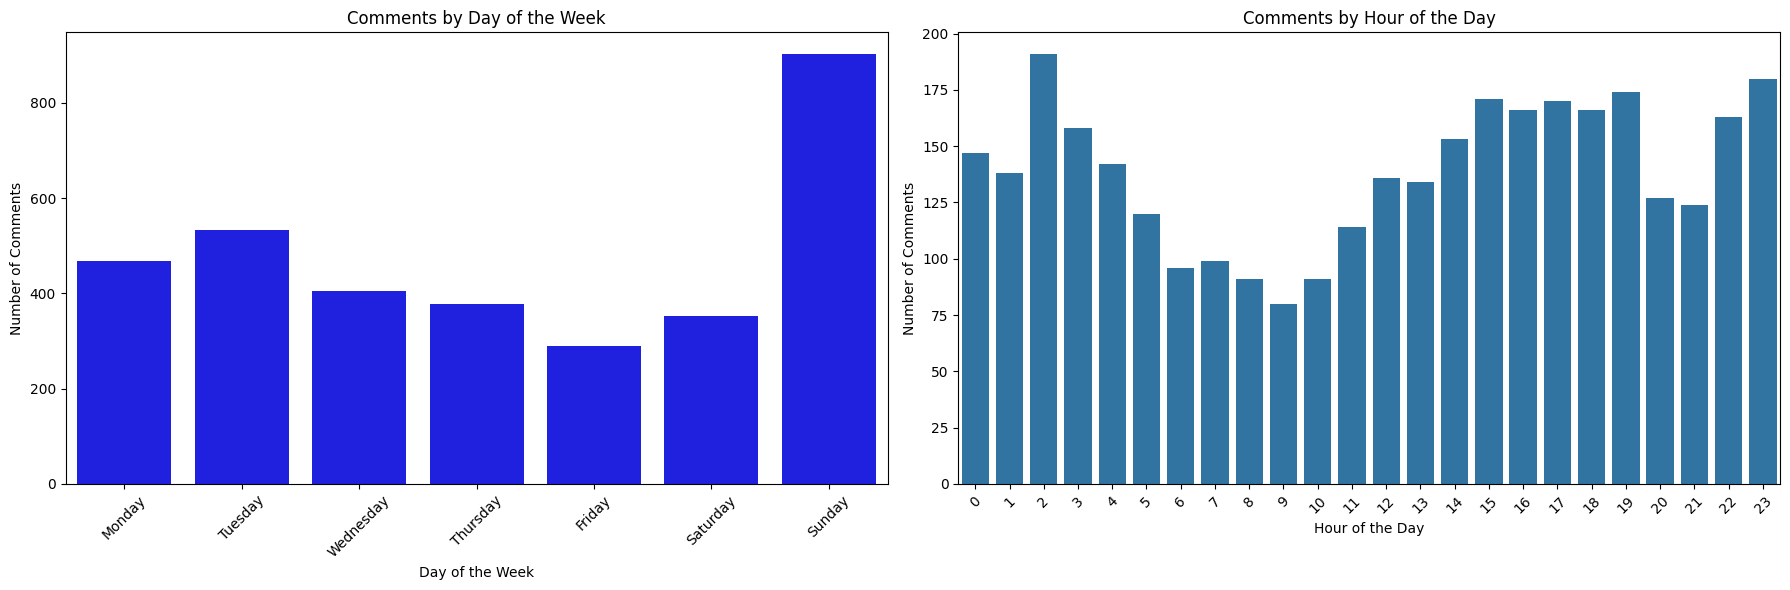

In [317]:
df_comments['publishedAt'] = pd.to_datetime(df_comments['publishedAt'])

# Extract day of week and hour of day
df_comments['day_of_week'] = df_comments['publishedAt'].dt.day_name()
df_comments['hour_of_day'] = df_comments['publishedAt'].dt.hour

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # This sets a large overall figure size

# Plot 1: Comments by Day of the Week
sns.countplot(data=df_comments, x='day_of_week',color='blue', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0])
axes[0].set_title('Comments by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Comments')
axes[0].tick_params(axis='x', rotation=45)  

# Plot 2: Comments by Hour of the Day
sns.countplot(data=df_comments, x='hour_of_day', ax=axes[1])
axes[1].set_title('Comments by Hour of the Day')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Comments')
axes[1].tick_params(axis='x', rotation=45) 

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


**Comment Analysis**

- Finding out which users leave the most comments 


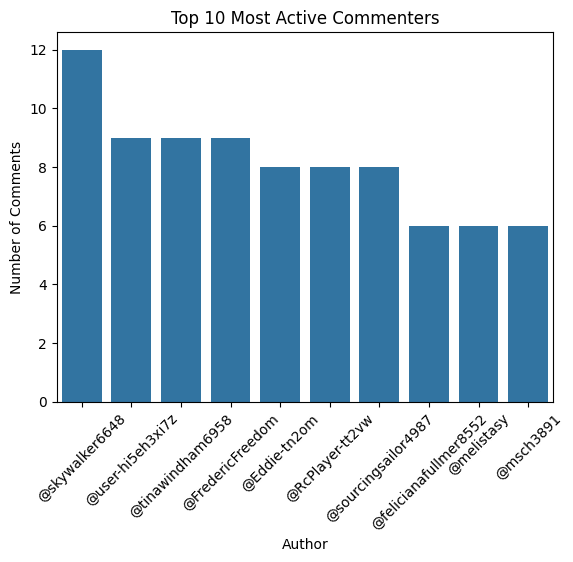

In [310]:
top_commenters = df_comments['author'].value_counts().head(10)
sns.barplot(x=top_commenters.index, y=top_commenters.values)
plt.title('Top 10 Most Active Commenters')
plt.xlabel('Author')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

- Investigate comments that are replies 

In [311]:
threaded_comments = df_comments[~df_comments['parent_id'].isnull()]
print(f"Percentage of comments that are replies: {len(threaded_comments) / len(df_comments) * 100:.2f}%")

Percentage of comments that are replies: 24.92%


- Analyzing the length of comments to explore how engagement varies by comment length

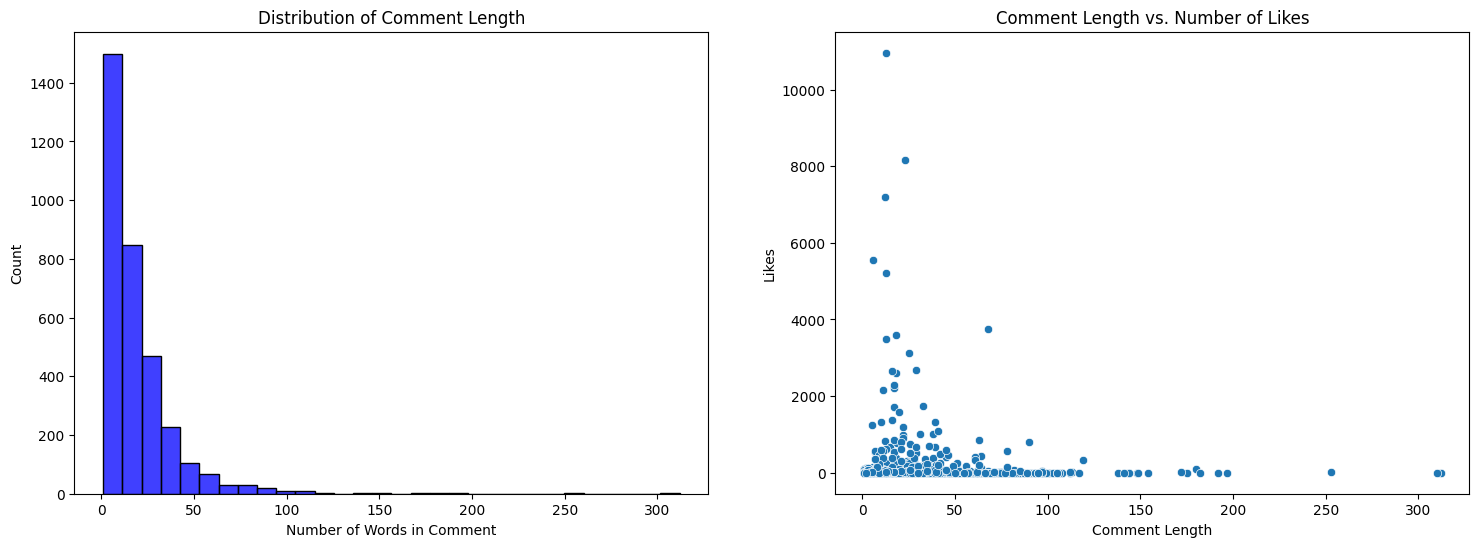

In [316]:
df_comments['comment_length'] = df_comments['comment'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(18, 6)) 

sns.histplot(df_comments['comment_length'], bins=30, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Comment Length')
axes[0].set_xlabel('Number of Words in Comment')

sns.scatterplot(data=df_comments, x='comment_length', y='like', ax=axes[1])
axes[1].set_title('Comment Length vs. Number of Likes')
axes[1].set_xlabel('Comment Length')
axes[1].set_ylabel('Likes')

plt.show()


## Sentiment Analysis

Performing sentiment analysis on the comments to understand the overall sentiment expressed by viewers. 

Sentiment analysis categorizes text as positive, negative, or neutral. This can give you an idea of how viewers feel about the topic or the video itself.

> To perform sentiment analysis using RoBERTa, we'll need to leverage a pre-trained RoBERTa model fine-tuned for sentiment analysis, such as roberta-base-sentiment from Hugging Face's Transformers library. 

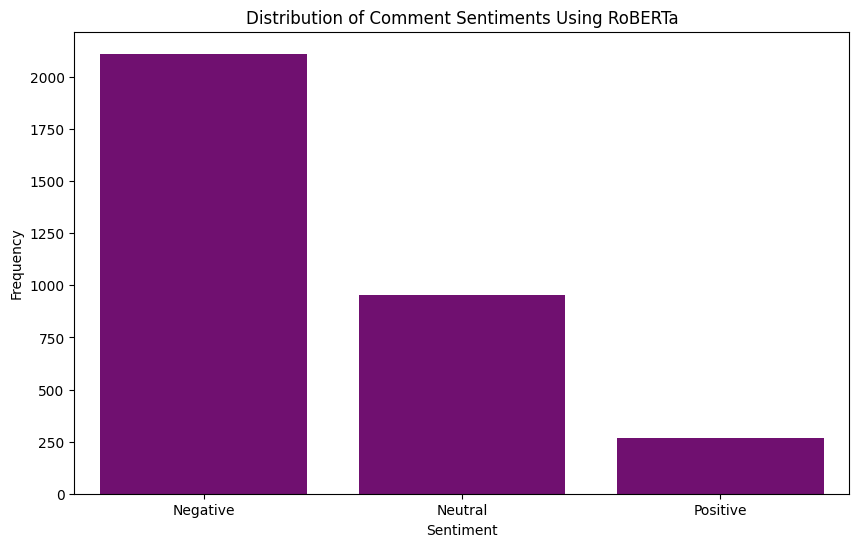

In [327]:
# Load the RoBERTa sentiment-analysis pipeline
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Function to analyze sentiment using RoBERTa
def analyze_sentiment(comment):
    if pd.isna(comment):  # Check for NaN values
        return None
    try:
        # Analyze sentiment
        result = sentiment_model(comment)[0]
        # Map to numeric score (you can customize this)
        if result['label'] == 'LABEL_2':  # Positive
            return 1
        elif result['label'] == 'LABEL_1':  # Neutral
            return 0
        elif result['label'] == 'LABEL_0':  # Negative
            return -1
    except Exception as e:
        print(f"Error analyzing comment: {comment}, Error: {e}")
        return None

# Apply the sentiment analysis function to the comments column
df_comments['comment_sentiment_roberta'] = df_comments['comment'].apply(analyze_sentiment)


# Map sentiment scores to labels
sentiment_mapping = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df_comments['sentiment_label'] = df_comments['comment_sentiment_roberta'].map(sentiment_mapping)

# Create a countplot for sentiment labels
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=df_comments, order=['Negative', 'Neutral', 'Positive'], color='purple')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Sentiments Using RoBERTa')

# Show the plot
plt.show()


**Calculate Basic Statistics**

Calculating average sentiment scores, variance, and standard deviation to get an overview of the sentiment distribution in the comments

In [334]:
# Calculate basic statistics
average_sentiment = df_comments['comment_sentiment_roberta'].mean()
variance_sentiment = df_comments['comment_sentiment_roberta'].var()
std_dev_sentiment = df_comments['comment_sentiment_roberta'].std()

summary_stats = {
    'Average Sentiment Score': average_sentiment,
    'Variance': variance_sentiment,
    'Standard Deviation': std_dev_sentiment
}
summary_df = pd.DataFrame(summary_stats, index=['Values']).T
summary_df

,Values
Average Sentiment Score,-0.554188
Variance,0.406297
Standard Deviation,0.637414


**Trends Over Time**

Analyzing how sentiment scores change over time

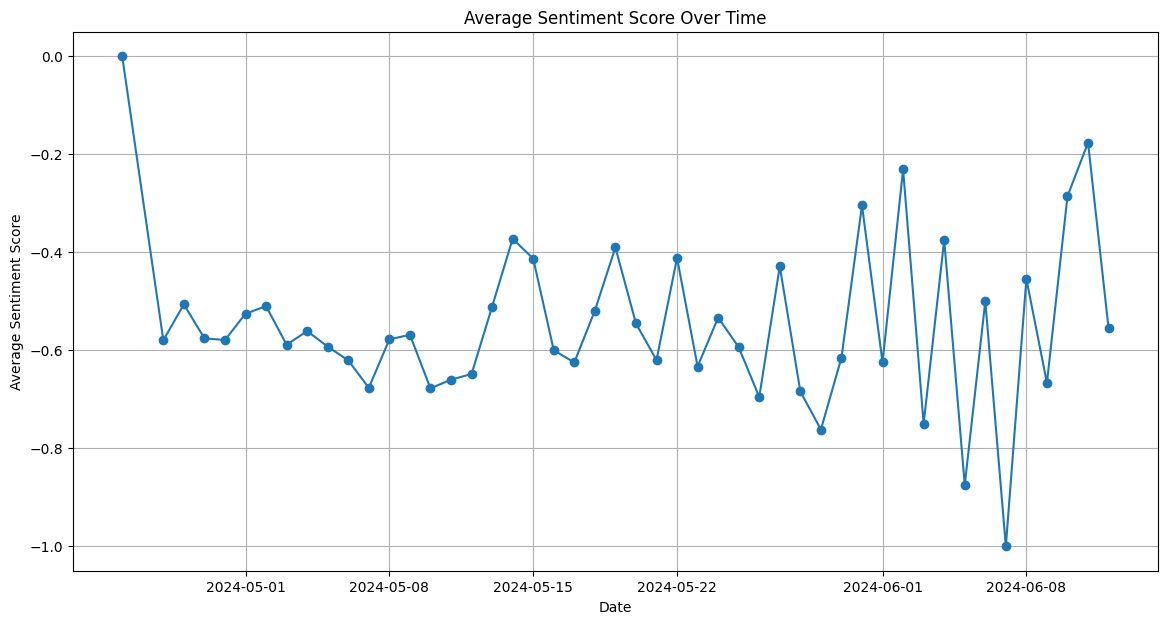

In [339]:
# Group by date and calculate average sentiment scores
daily_sentiment_trends = df_comments.groupby(df_comments['publishedAt'].dt.date)['comment_sentiment_roberta'].mean()

# Plotting the trend of average sentiment scores over time
plt.figure(figsize=(14, 7))
daily_sentiment_trends.plot(marker='o')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.show()


## Emotions Analysis

Using the RoBERTa base Go Emotion model for emotions analysis and visualization

**Extract Top Emotions and Store Them**

Extracting the top two emotions by sorting the emotions based on their scores and keeping the top ones

In [340]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Function to extract the top two emotions and their scores from the classifier output
def get_top_emotions_with_scores(text):
    results = classifier(text)
    # Since results is a list of lists, flatten the list if necessary
    if isinstance(results[0], list):
        results = results[0]
    # Sort by score and extract the top two emotions
    top_emotions = sorted(results, key=lambda x: x['score'], reverse=True)[:2]
    
    # Extract the emotion labels and scores
    emotions_labels = [emotion['label'] for emotion in top_emotions]
    emotions_scores = [emotion['score'] for emotion in top_emotions]
    
    # Return both labels and scores
    return emotions_labels + emotions_scores

# Apply the function to extract top emotions and scores for each comment
df_comments[['first_emotion', 'second_emotion', 'first_score', 'second_score']] = df_comments['comment'].apply(
    lambda x: pd.Series(get_top_emotions_with_scores(x))
)

# Display the updated DataFrame
df_comments.head()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,channel_id,video_id,comment_id,comment,like,author,publishedAt,parent_id,day_of_week,hour_of_day,comment_length,comment_sentiment_roberta,sentiment_label,first_emotion,second_emotion,first_score,second_score
0,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg,"If you’re ever injured in an accident, you can...",416,@LawAndCrime,2024-04-25 14:25:25+00:00,NaN,Thursday,14,45,0,Neutral,neutral,approval,0.951909,0.035625
1,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2lZje06vFW,40:51 i think she meant to say “we no longer h...,19,@geminienergy,2024-04-28 08:05:43+00:00,UgyF78L-ERyJb0bfyJt4AaABAg,Sunday,8,28,0,Neutral,neutral,realization,0.957942,0.015600
2,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2p-20Bnt1k,I absolutely agree with what you actually said...,10,@SH-hu4cl,2024-04-29 16:02:01+00:00,UgyF78L-ERyJb0bfyJt4AaABAg,Monday,16,18,-1,Negative,approval,sadness,0.595571,0.574862
3,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2pkRL8WCmw,You are.....,0,@ihateyoutubecomments8100,2024-04-29 23:04:54+00:00,UgyF78L-ERyJb0bfyJt4AaABAg,Monday,23,2,0,Neutral,neutral,approval,0.968803,0.010531
4,UCz8K1occVvDTYDfFo7N5EZw,NV1Kh7wvuAM,UgyF78L-ERyJb0bfyJt4AaABAg.A2eWnwtfiVYA2rW_BHL-z8,"I have no need at this time, but you have or s...",3,@cynthiatolman326,2024-04-30 15:33:31+00:00,UgyF78L-ERyJb0bfyJt4AaABAg,Tuesday,15,17,1,Positive,gratitude,admiration,0.989241,0.057686


**Vizualize Emotion Frequency Bar Plot**

Visualizing the frequency of the most common emotions to see which emotions are predominant.

/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/910739578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


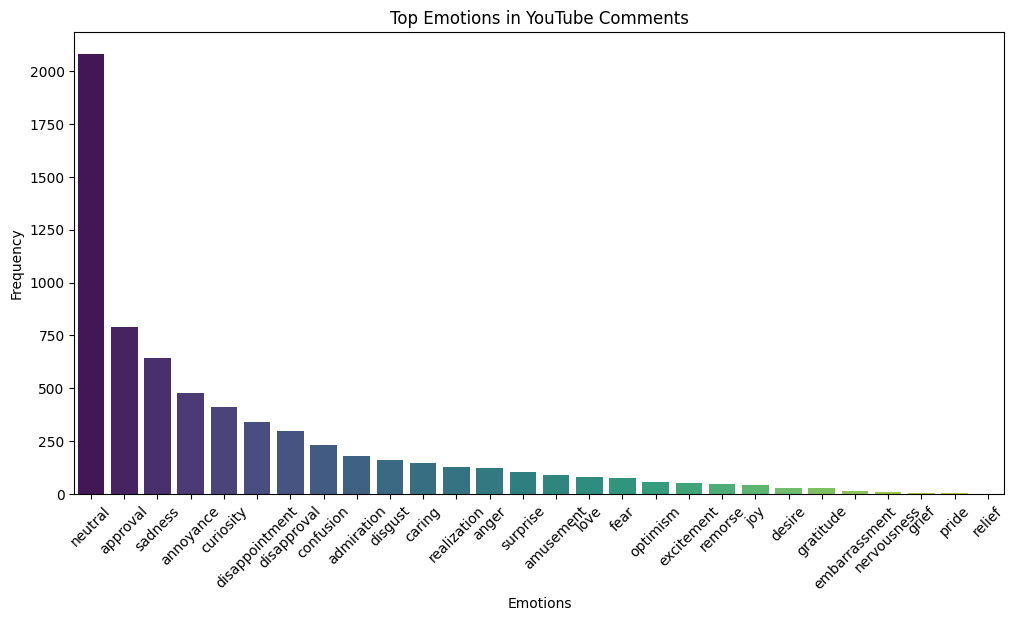

In [341]:
# Count occurrences of each emotion
emotion_counts = pd.concat([df_comments['first_emotion'], df_comments['second_emotion']]).value_counts()

# Plotting the emotion frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.title('Top Emotions in YouTube Comments')
plt.xticks(rotation=45)
plt.show()


**Emotion Co-occurrence Analysis**

Analyzing how often specific emotions appear together by visualizing a heatmap or a co-occurrence matrix.

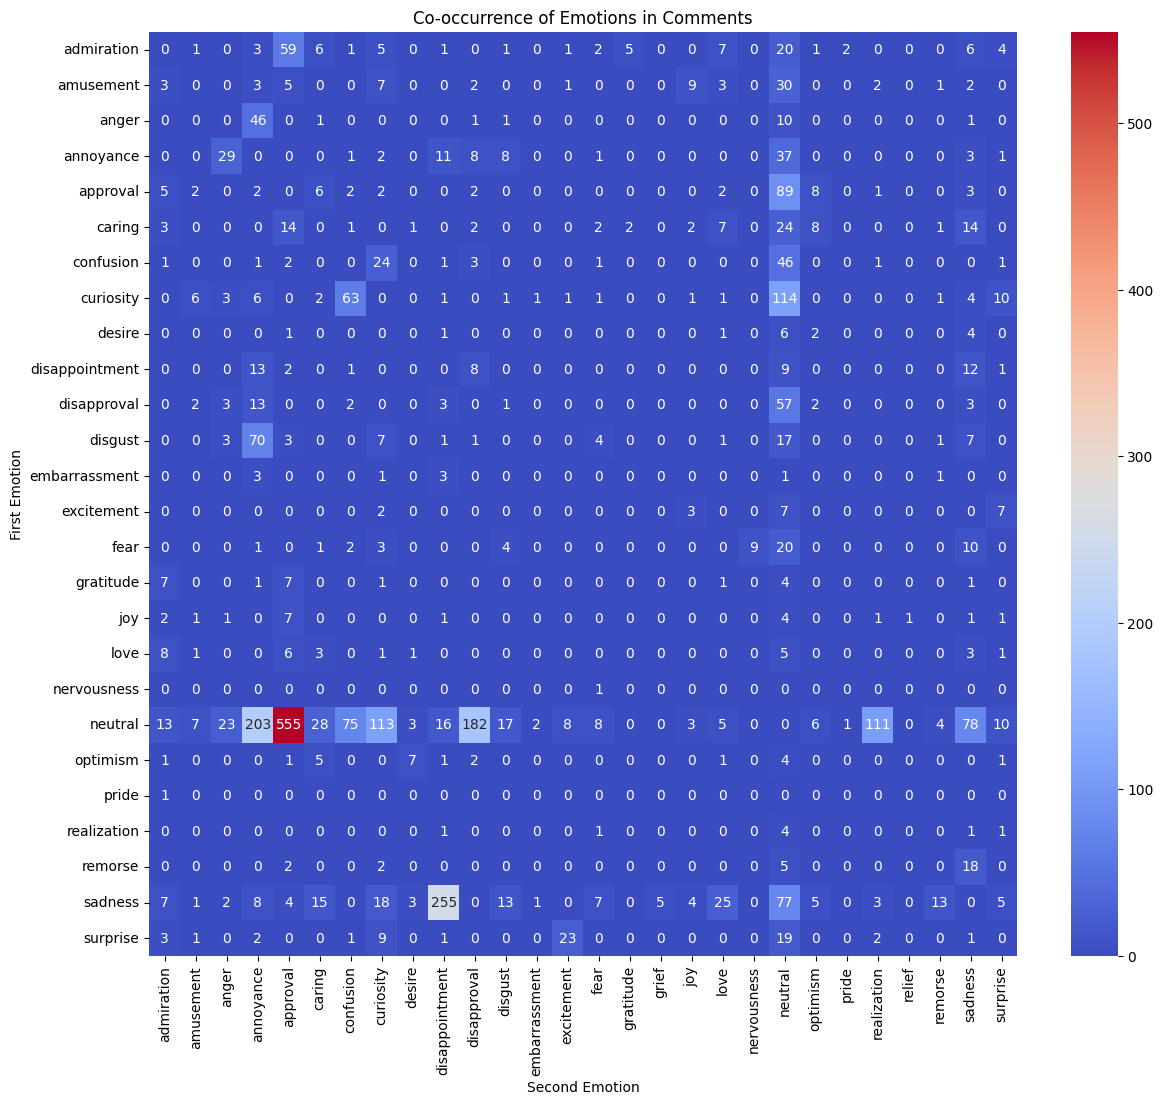

In [125]:
# Create a co-occurrence matrix of the top emotions
co_occurrence = pd.crosstab(df_comments['first_emotion'], df_comments['second_emotion'])

# Plotting the co-occurrence heatmap
plt.figure(figsize=(14, 12))  # Increase figure size for better readability
sns.heatmap(
    co_occurrence, 
    annot=True, 
    fmt='.0f',  # Adjust annotation format to show integer values
    cmap='coolwarm', 
    annot_kws={"size": 10}  # Adjust annotation font size
)
plt.title('Co-occurrence of Emotions in Comments')
plt.xlabel('Second Emotion')
plt.ylabel('First Emotion')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for clarity
plt.yticks(rotation=0)   # Optional: keep y-axis labels horizontal
plt.show()



**Sentiment Dynamics Over Time**

Analyzing how emotions vary over time

/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/112834920.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_comments['day'] = df_comments['publishedAt'].dt.to_period('D')  # Grouping by day


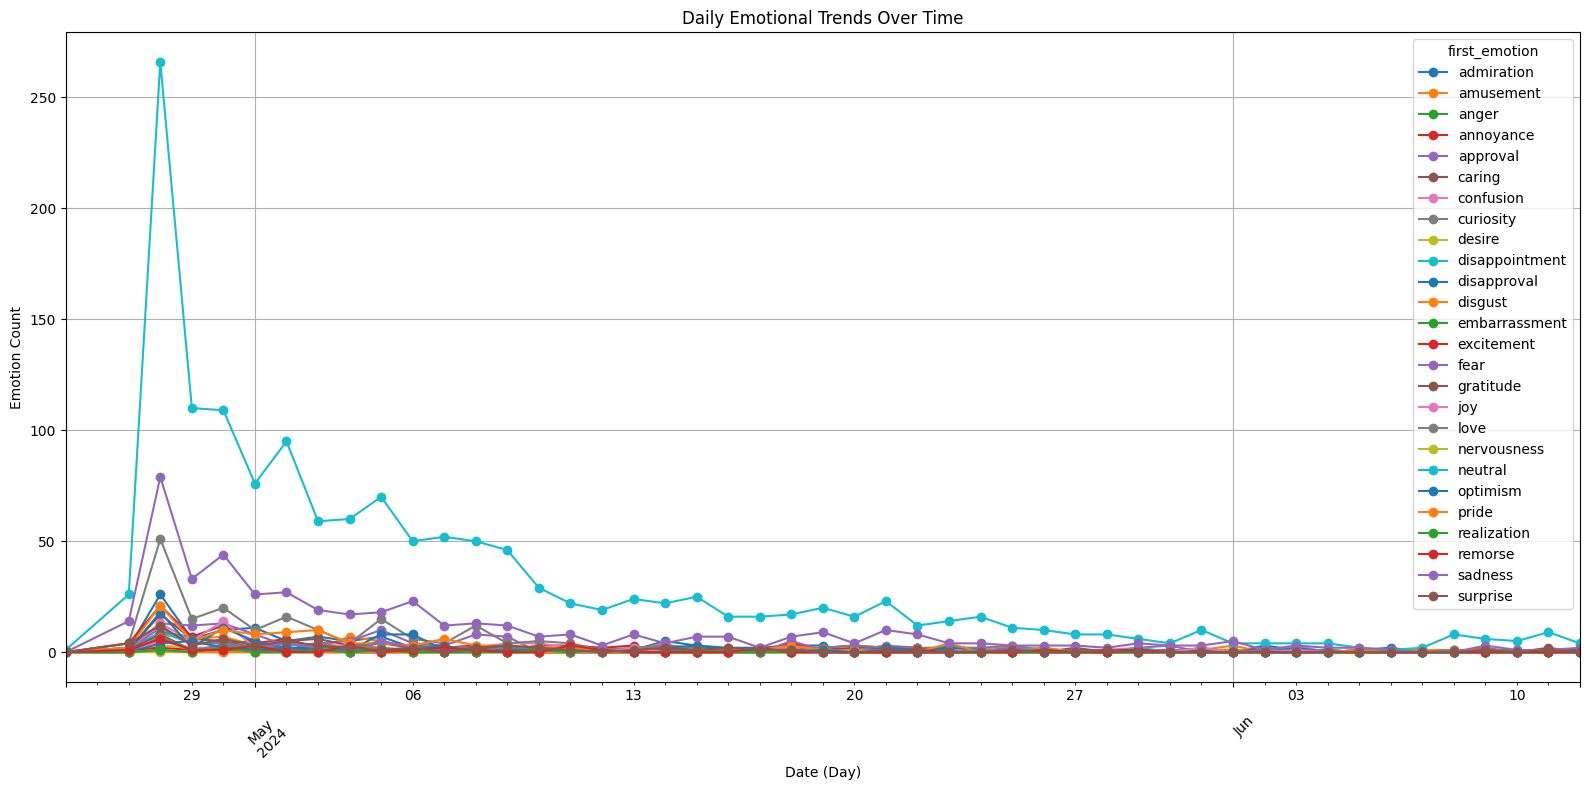

In [128]:
# Group by day and the first emotion detected
df_comments['day'] = df_comments['publishedAt'].dt.to_period('D')  # Grouping by day

# Group by day and count occurrences of specific emotions
emotion_trends_daily = df_comments.groupby(['day', 'first_emotion']).size().unstack(fill_value=0)

# Plotting the trend of emotions over time (daily)
plt.figure(figsize=(16, 8))
emotion_trends_daily.plot(marker='o', ax=plt.gca())  # Using gca() to plot on the current axes
plt.title('Daily Emotional Trends Over Time')
plt.xlabel('Date (Day)')
plt.ylabel('Emotion Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusts plot to prevent clipping of elements
plt.show()



**Outlier Detection in Emotional Responses**

Identify comments with extremely high or low sentiment scores or unique emotion combinations.

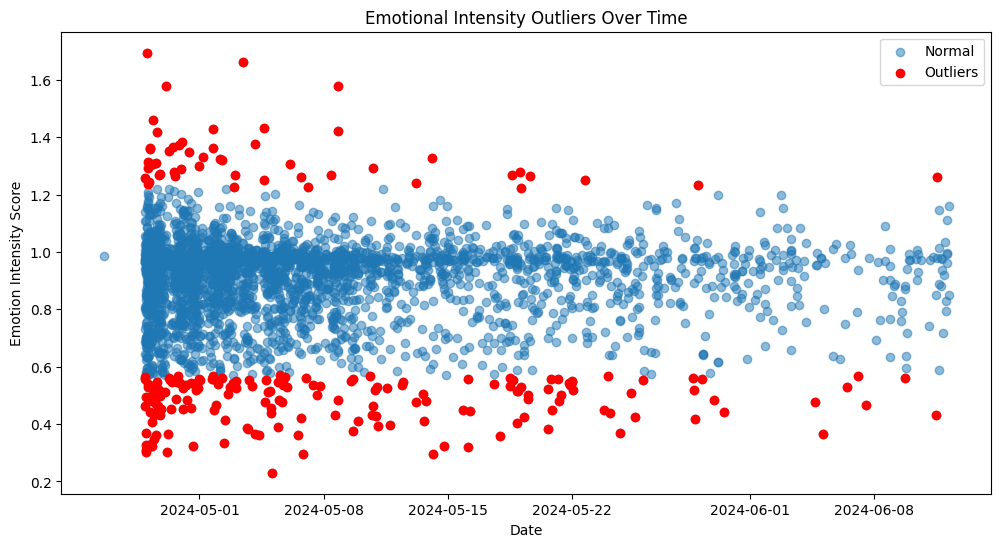

In [138]:
df_comments['emotion_intensity'] = df_comments['first_score'] + df_comments['second_score']

# Calculate z-scores to identify outliers
df_comments['intensity_zscore'] = zscore(df_comments['emotion_intensity'])

# Identify outliers based on z-scores
outliers = df_comments[(df_comments['intensity_zscore'] > 2) | (df_comments['intensity_zscore'] < -2)]

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df_comments['publishedAt'], df_comments['emotion_intensity'], label='Normal', alpha=0.5)
plt.scatter(outliers['publishedAt'], outliers['emotion_intensity'], color='red', label='Outliers')
plt.title('Emotional Intensity Outliers Over Time')
plt.xlabel('Date')
plt.ylabel('Emotion Intensity Score')
plt.legend()
plt.show()

**Sentiment by Comment Length**

Analyzing which emotions are more prevalent in different categories of comment lengths

/var/folders/v3/vzv7hgws4w50m44vnrtb6py80000gn/T/ipykernel_4427/1402953747.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emotion_by_length = df_comments.groupby('length_category')['first_emotion'].value_counts().unstack(fill_value=0)


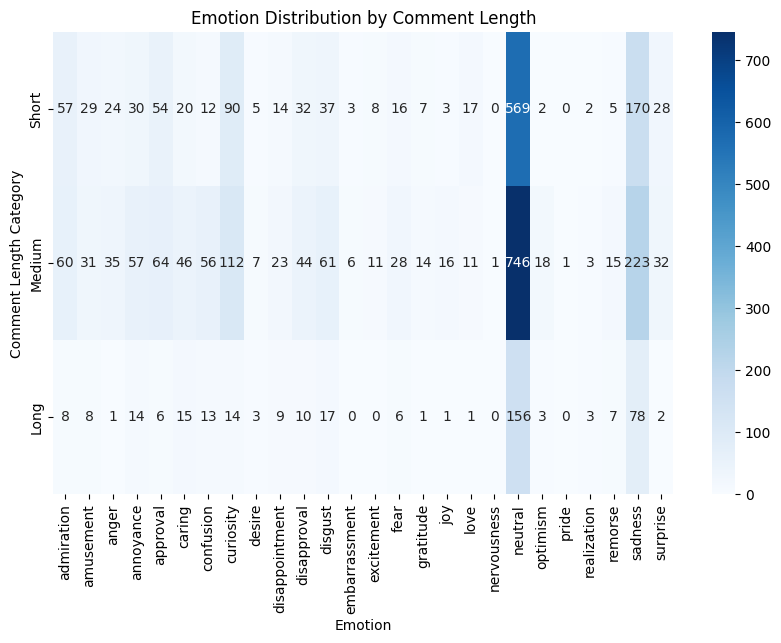

In [139]:
# 2. Sentiment by Comment Length or Engagement

# Step 1: Calculate comment length
df_comments['comment_length'] = df_comments['comment'].apply(lambda x: len(str(x)))

# Categorize comments into short, medium, and long based on length
df_comments['length_category'] = pd.cut(df_comments['comment_length'], bins=[0, 50, 200, float('inf')], labels=['Short', 'Medium', 'Long'])

# Step 2: Analyze emotion prevalence by comment length
# Count the most common first emotion by length category
emotion_by_length = df_comments.groupby('length_category')['first_emotion'].value_counts().unstack(fill_value=0)

# Visualize with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(emotion_by_length, annot=True, cmap='Blues', fmt='d')
plt.title('Emotion Distribution by Comment Length')
plt.xlabel('Emotion')
plt.ylabel('Comment Length Category')
plt.show()
